In [1]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

#pegando acoes
import pandas_datareader.data as web

In [2]:
#importando a carteira
carteira = pd.read_excel('Carteira_nova.xlsx')
display(carteira)

,Ativos,Valor Investido,Tipo,Qtde
0,ITUB3,2000.00,Ação,100
1,BBDC3,10000.00,Ação,500
2,TOTS3,5000.00,Ação,400
3,VILG11,7000.00,FII,10
4,MFII11,2000.00,FII,20
5,Tesouro Selic,23955.14,Renda Fixa,2


In [3]:
x1= carteira.groupby('Tipo').sum().reset_index()
x1['Tipo']

0          Ação
1           FII
2    Renda Fixa
Name: Tipo, dtype: object

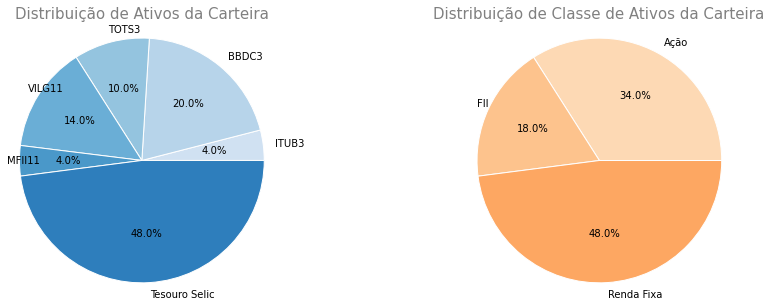

In [4]:
fig, ax = plt.subplots(nrows=1 , ncols=2, figsize=(15, 5))

x = carteira['Valor Investido']

color1 = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

ax[0].pie(x, labels=carteira['Ativos'], radius=3, center=(4, 4),colors=color1,
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True,autopct="%.1f%%")

ax[0].set_title('Distribuição de Ativos da Carteira', color='Grey', size=15)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].yaxis.set_visible(False)
ax[0].xaxis.set_visible(False)


x_1 = x1['Valor Investido']
color2 = plt.get_cmap('Oranges')(np.linspace(0.2, 0.7, len(x)))

ax[1].pie(x_1, labels=x1['Tipo'], radius=3, center=(4, 4),colors=color2,
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True,autopct="%.1f%%")

ax[1].set_title('Distribuição de Classe de Ativos da Carteira', color='Grey', size=15)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].yaxis.set_visible(False)
ax[1].xaxis.set_visible(False)

plt.show()

## Pegando cotacoes

### IBOV

In [5]:
ibov_df = web.DataReader('^BVSP', data_source='yahoo', start='2022-01-01', end='2022-08-20')
display(ibov_df)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,106125,103413,104823,103922,11128500,103922
2022-01-04,104276,103096,103922,103514,11491600,103514
2022-01-05,103514,100850,103514,101006,0,101006
2022-01-06,102235,101000,101006,101561,11749200,101561
2022-01-07,102719,101104,101561,102719,11733200,102719
...,...,...,...,...,...,...
2022-08-15,113214,111067,112767,113032,15552900,113032
2022-08-16,113626,112690,113034,113512,12986400,113512
2022-08-17,114146,112483,113508,113708,14652800,113708


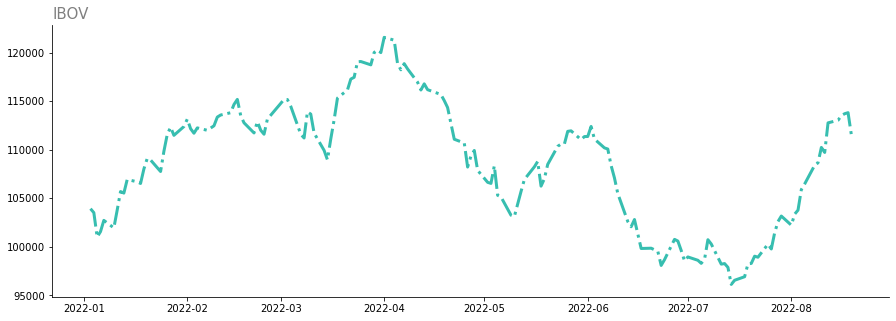

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))

x=ibov_df.index
y=ibov_df['Adj Close']

ax.plot(x, y, linewidth=3.0,color='#37BEB0',ls='-.')
ax.set_title('IBOV', color='Grey', size=15,loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [7]:
carteira2 = pd.DataFrame()

for ativo in carteira['Ativos']:
    if 'Tesouro' not in ativo:
        carteira2[ativo] = web.DataReader('{}.SA'.format(ativo), data_source='yahoo', start='2022-01-01', end='2022-08-20')['Adj Close']
carteira2 = carteira2.ffill()
print(carteira2.info())
display(carteira2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 2022-01-03 to 2022-08-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ITUB3   160 non-null    float64
 1   BBDC3   160 non-null    float64
 2   TOTS3   160 non-null    float64
 3   VILG11  160 non-null    float64
 4   MFII11  160 non-null    float64
dtypes: float64(5)
memory usage: 7.5 KB
None


,ITUB3,BBDC3,TOTS3,VILG11,MFII11
Date,,,,,
2022-01-03,18.987141,14.732565,27.400362,94.389557,100.053520
2022-01-04,19.408426,14.801403,26.294384,95.477402,100.025772
2022-01-05,19.016535,14.703379,25.128622,91.456276,100.201424
2022-01-06,19.359438,14.863780,25.905798,93.777649,97.529762
2022-01-07,19.663158,14.926157,25.009058,95.118019,97.169212
...,...,...,...,...,...
2022-08-15,22.697186,16.020000,30.219999,104.309998,94.000000
2022-08-16,22.953762,16.299999,29.590000,104.779999,94.800003
2022-08-17,23.022840,16.360001,30.070000,104.500000,97.000000


### Tesouro
- link: https://www.tesourotransparente.gov.br/ckan/dataset/taxas-dos-titulos-ofertados-pelo-tesouro-direto/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1

In [8]:
link = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
tesouro = pd.read_csv(link, sep=';', decimal=',')
tesouro['Data Base'] = pd.to_datetime(tesouro['Data Base'], format='%d/%m/%Y')
tesouro = tesouro.loc[tesouro['Tipo Titulo']=='Tesouro Selic', :]
display(tesouro)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
15,Tesouro Selic,07/03/2015,2014-08-12,0.00,0.01,6272.51,6272.15,6269.55
20,Tesouro Selic,07/03/2017,2014-08-12,-0.01,0.02,6274.11,6269.30,6266.70
26,Tesouro Selic,07/03/2017,2014-08-15,-0.01,0.02,6281.84,6277.04,6274.43
38,Tesouro Selic,07/03/2017,2014-09-17,0.00,0.03,6339.83,6335.16,6332.53
43,Tesouro Selic,07/03/2017,2014-08-20,-0.01,0.02,6289.57,6284.79,6282.19
...,...,...,...,...,...,...,...,...
124262,Tesouro Selic,07/03/2015,2013-04-22,-0.03,-0.01,5566.83,5564.73,5563.14
124265,Tesouro Selic,07/03/2017,2013-04-22,-0.04,0.00,5572.31,5563.69,5562.09
124273,Tesouro Selic,07/03/2015,2013-03-21,-0.02,0.00,5533.73,5531.56,5530.03
124279,Tesouro Selic,07/03/2017,2013-03-21,-0.03,0.01,5538.12,5529.37,5527.84


- adicionando o tesouro selic no dataframe carteira2

In [9]:
tesouro = tesouro.rename(columns={'Data Base': 'Date'})
carteira2 = carteira2.merge(tesouro[['Date', 'PU Base Manha']], on='Date', how='left')
carteira2 = carteira2.rename(columns={'PU Base Manha': 'Tesouro Selic'})
display(carteira2)

,Date,ITUB3,BBDC3,TOTS3,VILG11,MFII11,Tesouro Selic
0,2022-01-03,18.987141,14.732565,27.400362,94.389557,100.053520,11228.88
1,2022-01-03,18.987141,14.732565,27.400362,94.389557,100.053520,11201.71
2,2022-01-03,18.987141,14.732565,27.400362,94.389557,100.053520,11183.97
3,2022-01-03,18.987141,14.732565,27.400362,94.389557,100.053520,11088.54
4,2022-01-04,19.408426,14.801403,26.294384,95.477402,100.025772,11232.65
...,...,...,...,...,...,...,...
635,2022-08-18,22.973499,16.430000,31.080000,105.250000,97.800003,12015.39
636,2022-08-19,22.700001,16.209999,30.799999,105.449997,97.050003,12051.33
637,2022-08-19,22.700001,16.209999,30.799999,105.449997,97.050003,11952.54
638,2022-08-19,22.700001,16.209999,30.799999,105.449997,97.050003,12033.20


- Calculando Valor Investido

In [10]:
valor_investido = carteira2.copy()

for ativo in carteira['Ativos']:
    valor_investido[ativo] = valor_investido[ativo] * carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0]

valor_investido = valor_investido.set_index('Date')
valor_investido['Total'] = valor_investido.sum(axis=1)
display(valor_investido)

,ITUB3,BBDC3,TOTS3,VILG11,MFII11,Tesouro Selic,Total
Date,,,,,,,
2022-01-03,1898.714066,7366.282463,10960.144806,943.895569,2001.070404,22457.76,45627.867307
2022-01-03,1898.714066,7366.282463,10960.144806,943.895569,2001.070404,22403.42,45573.527307
2022-01-03,1898.714066,7366.282463,10960.144806,943.895569,2001.070404,22367.94,45538.047307
2022-01-03,1898.714066,7366.282463,10960.144806,943.895569,2001.070404,22177.08,45347.187307
2022-01-04,1940.842628,7400.701523,10517.753601,954.774017,2000.515442,22465.30,45279.887212
...,...,...,...,...,...,...,...
2022-08-18,2297.349930,8215.000153,12431.999969,1052.500000,1956.000061,24030.78,49983.630113
2022-08-19,2270.000076,8104.999542,12319.999695,1054.499969,1941.000061,24102.66,49793.159344
2022-08-19,2270.000076,8104.999542,12319.999695,1054.499969,1941.000061,23905.08,49595.579344


In [11]:
valor_investido_norm = valor_investido / valor_investido.iloc[0]
ibov_df_norm = ibov_df / ibov_df.iloc[0]

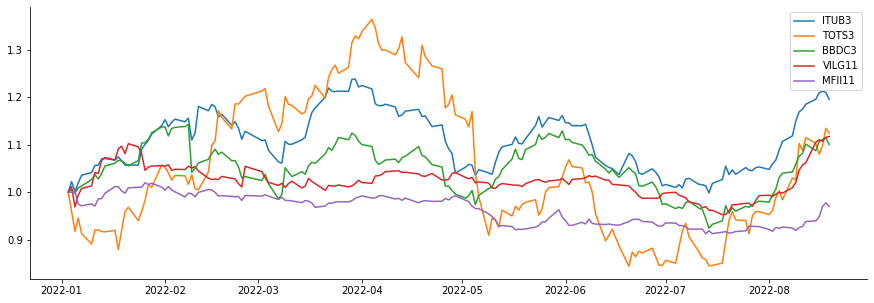

In [12]:
fig, ax = plt.subplots(figsize=(15,5))

x = valor_investido_norm.index
y = valor_investido_norm['ITUB3']
x1 = valor_investido_norm.index
y1 = valor_investido_norm['TOTS3']
x2 = valor_investido_norm.index
y2 = valor_investido_norm['BBDC3']
x3 = valor_investido_norm.index
y3 = valor_investido_norm['VILG11']
x4 = valor_investido_norm.index
y4 = valor_investido_norm['MFII11']

ax.plot(x,y,label = 'ITUB3')
ax.plot(x1,y1,label = 'TOTS3')
ax.plot(x2,y2,label = 'BBDC3')
ax.plot(x3,y3,label = 'VILG11')
ax.plot(x4,y4,label = 'MFII11')

ax.legend(bbox_to_anchor=(1, 1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

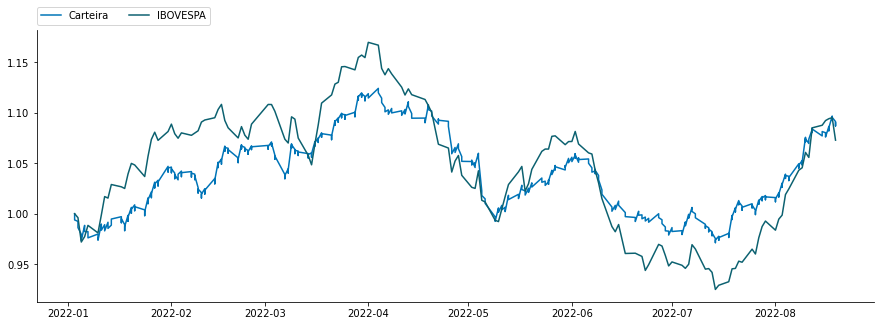

In [13]:
fig, ax = plt.subplots(figsize=(15,5))

x = valor_investido_norm.index
y = valor_investido_norm['Total']
x1 = ibov_df_norm.index
y1 = ibov_df_norm['Adj Close'] 

ax.plot(x,y,color = '#0074B7',label='Carteira')
ax.plot(x1,y1,color = '#0C6170',label= 'IBOVESPA')

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102),loc='lower left', ncol=2, borderaxespad=0.)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [14]:
rentabilidade_carteira = valor_investido_norm['Total'].iloc[-1] - 1
rentabilidade_ibov = ibov_df_norm['Adj Close'].iloc[-1] - 1 
print('Rentabilidade da Carteira {:.1%}'.format(rentabilidade_carteira))
print('Rentabilidade do Ibovespa {:.1%}'.format(rentabilidade_ibov))

Rentabilidade da Carteira 9.0%
Rentabilidade do Ibovespa 7.3%


### Conclusão

- Aporte + Tempo + Diversificação é o que faz ter uma carteira consistente.
- Isso olhando somente 2022 até 20 de agosto

Link para comunidade bastter: https://bastter.com/

## Extra
### Criando comparações com as açoes usando o Yahoo Finance.

- creditos ao autor: https://simply-python.com/2019/01/16/retrieving-stock-statistics-from-yahoo-finance-using-python/

In [15]:
def get_key_stats(tgt_website, ticker):
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
    df_list = pd.read_html(requests.get(tgt_website, headers=headers).text)
    result_df = df_list[0]
    for df in df_list[1:]:
        result_df = result_df.append(df)
    result_df = result_df.rename(columns={1: ticker})
    result_df = result_df.set_index(0).T
    for coluna in result_df:
        result_df[coluna] = result_df[coluna].astype(float, errors="ignore")
    return result_df


In [16]:
acoes = ['ENBR3', 'SLCE3','WEGE3','EGIE3']

est = pd.DataFrame()

for acao in acoes:
    link = f'https://sg.finance.yahoo.com/quote/{acao}.SA/key-statistics?p={acao}.SA'
    df = get_key_stats(link, acao)
    est = est.append(df)
    
display(est)

C:\Users\braul\AppData\Local\Temp\ipykernel_13172\120893311.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(df)
C:\Users\braul\AppData\Local\Temp\ipykernel_13172\120893311.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(df)
C:\Users\braul\AppData\Local\Temp\ipykernel_13172\120893311.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(df)
C:\Users\braul\AppData\Local\Temp\ipykernel_13172\120893311.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(df)
C:\Users\braul\AppData\Local\Temp\ipykernel_13172\120893311.py:6

,Market cap (intra-day),Enterprise value,Trailing P/E,Forward P/E,PEG Ratio (5 yr expected),Price/sales (ttm),Price/book (mrq),Enterprise value/revenue,Enterprise value/EBITDA,Beta (5Y monthly),...,Diluted EPS (ttm),Quarterly earnings growth (yoy),Total cash (mrq),Total cash per share (mrq),Total debt (mrq),Total debt/equity (mrq),Current ratio (mrq),Book value per share (mrq),Operating cash flow (ttm),Levered free cash flow (ttm)
ENBR3,13.41B,23.99B,6.19,9.21,NaN,0.72,1.19,1.26,4.66,0.37,...,3.83,10.60%,2.56B,4.51,13.43B,107.94,1.66,19.82,3.05B,-1.52B
SLCE3,9.04B,14.34B,6.86,6.83,NaN,1.24,1.93,1.74,4.89,0.37,...,6.37,13.20%,640.84M,3.08,6.94B,134.40,1.83,23.29,1.2B,-583.09M
WEGE3,125.25B,125.57B,35.35,32.36,NaN,4.68,9.34,4.69,25.67,0.89,...,0.84,-19.50%,3.07B,0.73,3.39B,24.54,1.69,3.20,472.74M,-924.31M
EGIE3,34.11B,48.94B,19.43,12.29,NaN,2.79,4.30,4.01,6.91,0.53,...,2.15,23.70%,4.31B,5.29,21.54B,271.69,1.40,9.71,2.46B,759.62M


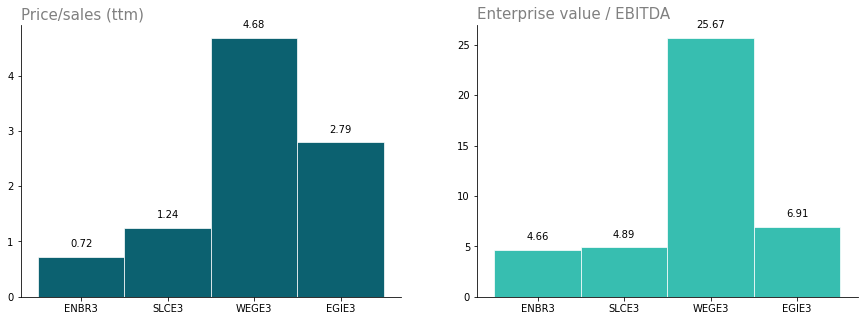

In [17]:
# Price/sales (ttm)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

x=est.index
y=est['Price/sales (ttm)']

ax[0].bar(x, y, width=1,color='#0C6170', edgecolor="white", linewidth=0.7)
ax[0].set_title('Price/sales (ttm)', color='Grey', size=15,loc='left')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

for i in range(0,4):
    ax[0].annotate(y[i],(x[i],y[i]),ha="center",xytext = (0,10),textcoords = "offset points")

x1= est.index
y1= est['Enterprise value/EBITDA']

ax[1].bar(x1, y1, width=1,color='#37BEB0', edgecolor="white", linewidth=0.7)
ax[1].set_title('Enterprise value / EBITDA', color='Grey', size=15,loc='left')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

for i in range(0,4):
    ax[1].annotate(y1[i],(x1[i],y1[i]),ha="center",xytext = (0,10),textcoords = "offset points")

plt.show()